In [1]:
import pandas as pd

In [4]:
ratings = pd.read_csv('ratings.csv')
musics = pd.read_csv('musics_comma.csv', engine='python',  encoding='utf_8_sig', sep=',', quotechar='"', error_bad_lines=False)

In [5]:
ratings.head()

,music,uid,score
0,155,ahoudori,10
1,377,ahoudori,10
2,572,熊谷,11
3,550,熊谷,11
4,157,熊谷,10


<AxesSubplot:>

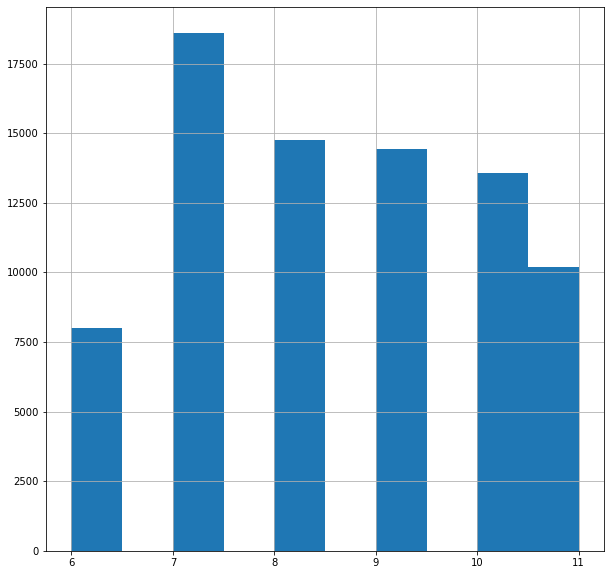

In [7]:
ratings['score'].hist(bins=10, figsize=(10,10))

Skipping line 3351: ',' expected after '"'
Skipping line 9085: ',' expected after '"'
Skipping line 9535: ',' expected after '"'
Skipping line 9718: ',' expected after '"'
Skipping line 10911: ',' expected after '"'
Skipping line 11337: ',' expected after '"'
Skipping line 11397: ',' expected after '"'
Skipping line 13869: ',' expected after '"'
Skipping line 14072: ',' expected after '"'
Skipping line 15109: ',' expected after '"'
Skipping line 15193: unexpected end of data


In [15]:
musics.head()

,id,name
0,7783,琥珀の祈り
1,3727,Déjà vu
2,33,バトルできゅんっ！なキングダム☆
3,32,Jumping Star
4,34,キラキラ☆恋ゴコロ


In [16]:
# music_idをキーにしてマージ
merged_df = ratings.merge(musics, left_on='music', right_on='id', suffixes=['_user', ''])
merged_df.head()

,music,uid,score,id,name
0,155,ahoudori,10,155,Glorious Days
1,155,aiko1122,9,155,Glorious Days
2,155,ihave,7,155,Glorious Days
3,155,selfeena,10,155,Glorious Days
4,155,twinklestar_act2,8,155,Glorious Days


In [18]:
# 学習に用いる特徴量を抽出
merged_df = merged_df[['uid', 'name', 'score']]
# 重複を削除
merged_df = merged_df.drop_duplicates(['uid', 'name'])

merged_df.head()

,uid,name,score
0,ahoudori,Glorious Days,10
1,aiko1122,Glorious Days,9
2,ihave,Glorious Days,7
3,selfeena,Glorious Days,10
4,twinklestar_act2,Glorious Days,8


In [21]:
# import Machine-Learning library
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

uid,00999,01040228,0321445,0495ex,050325,0504,0824064,09848754,0987643,0rdinary,...,霧雨,響季,騎羅大和,魔中年,鳳,黄昏の統括者,（光）エロゲの罪,（＾ｐ＾）,ｃ1095161,ｋｔｍ715
name,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(I will) be with you,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(^3^)chu☆でれ☆らぷそでぃ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(a)SLOW STAR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
*bloom*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# ゲーソンを軸にグルーピング
musics_pivot = merged_df.pivot(index='name', columns='uid', values='score').fillna(0)
musics_pivot_sparse = csr_matrix(musics_pivot.values)

musics_pivot.head()

uid,00999,01040228,0321445,0495ex,050325,0504,0824064,09848754,0987643,0rdinary,...,霧雨,響季,騎羅大和,魔中年,鳳,黄昏の統括者,（光）エロゲの罪,（＾ｐ＾）,ｃ1095161,ｋｔｍ715
name,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(I will) be with you,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(^3^)chu☆でれ☆らぷそでぃ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(a)SLOW STAR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
*bloom*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# k=9, 最適化アルゴリズム=, 距離=コサイン類似度でknnインスタンスを作成
knn = NearestNeighbors(n_neighbors=9, algorithm='brute', metric='cosine')
# モデルを訓練
model_knn = knn.fit(musics_pivot_sparse)

In [24]:
# k=11で引数に入れるアニメから類似する順に10個のアニメを返す
def music_recommend(music):
    distance, indice = model_knn.kneighbors(musics_pivot.iloc[musics_pivot.index== music].values.reshape(1,-1),n_neighbors=11)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recommendations if you like the music {0}:\n'.format(musics_pivot[musics_pivot.index== music].index[0]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,musics_pivot.index[indice.flatten()[i]],distance.flatten()[i]))

In [33]:
music_recommend('二人だけのカーテンコール')

Recommendations if you like the music 二人だけのカーテンコール:

1: アオイトリ with distance: 0.2319399466809895
2: タビダチノトリ with distance: 0.3161117828338542
3: こころに響く恋ほたる with distance: 0.5073806793779418
4: コトダマ紡ぐ未来 with distance: 0.50968832362391
5: 繋がるココロ with distance: 0.5711706548557314
6: 幻想楼閣 with distance: 0.621352736550449
7: 後ろ髪の証跡 with distance: 0.6297201857795766
8: i:\DRIVE with distance: 0.638681562550339
9: Sky Baby with distance: 0.6835960936310945
10: 永続的恋愛理論 with distance: 0.6874617178620188
